In [48]:
import boolean2 as bl
import matplotlib.pylab as pl
import numpy as np

In [51]:
import itertools

def getRule(node, act, inh):

    actLen = len(act)
    inhLen = len(inh)
        
    rules = []
    
    for case in itertools.product([0, 1], repeat=actLen + inhLen):
        actLevel = sum(case[0:actLen]) 
        inhLevel = sum(case[actLen:])
        if actLevel > 0 and actLevel >= inhLevel:
            rules.append(case)
    
    res = ""
    
    for rule in rules:                
        line = ""
            
        for idx, val in enumerate(act + inh):         
            if line != "":
                line += " and "
            
            if rule[idx] == 0:
                line += "not " + val
            else:
                line += "" + val
        
        if res != "":
            res += " or "
        
        res += line
        
    if res != "":
        return "1: " + node + "* = "+ res + "\n"
    else:
        return ""
    
# getRule("RES", ["A"], ["X", "Y"])

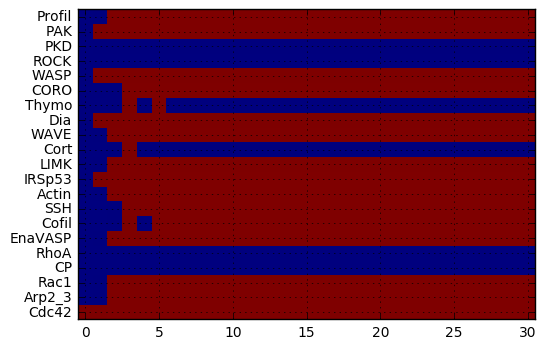

In [52]:
def initFunc(node):
    if node == "Cdc42":
        return True
    else:
        return False

rules = ""
rules += getRule("Rac1", ["Dia", "Arp2_3", "Thymo"], ["ROCK"])
rules += getRule("RhoA", [], ["Rac1", "PAK"])
rules += getRule("Cort", ["(Rac1 and PAK)"], ["CORO", "PAK", "PKD"])
rules += getRule("ROCK", ["RhoA"], ["(CORO and SSH)"])
rules += getRule("IRSp53", ["Rac1", "Cdc42"], [])
rules += getRule("WASP", ["(Cdc42 and Profil)", "Cdc42", "Rac1", "IRSp53", "Cort", "Profil", "Actin"],["Thymo"])
rules += getRule("Thymo", ["Rac1"],["Cofil", "WASP"])
rules += getRule("PKD", ["ROCK"], [])
rules += getRule("PAK", ["Cdc42", "Rac1", "PKD"],[])
rules += getRule("WAVE", ["Rac1", "IRSp53", "Profil"],[])
rules += getRule("Dia", ["Cdc42", "Rac1", "RhoA", "IRSp53"],["EnaVASP", "CP"])
rules += getRule("LIMK", ["PAK", "ROCK"],["SSH"])
rules += getRule("SSH", ["Rac1", "CORO", "Actin"],["PKD"])
rules += getRule("EnaVASP", ["IRSp53", "PKD"],[])
rules += getRule("CP", ["Arp2_3"],["EnaVASP", "Dia"])
rules += getRule("CORO", ["SSH", "Actin"],[])
rules += getRule("Cofil", ["Arp2_3", "SSH"],["Cort", "Thymo", "LIMK"])
rules += getRule("Profil", ["Dia"],["Thymo"])
rules += getRule("Arp2_3", ["(WAVE and IRSp53)", "(WASP and Cort)", "WAVE", "WASP", "Cort", "PAK", "CP"],["Profil", "Thymo","CORO", "Cofil"])
rules += getRule("Actin", ["(Arp2_3 and not Cofil)", "Dia", "EnaVASP", "Arp2_3", "(EnaVASP and Profil)"],["Thymo", "CP", "Cofil", "Profil"])


oldRules = """
1: Rac1* = Dia or Arp2_3 or Thymo or not ROCK
1: RhoA* = not Rac1 or not PAK
1: Cort* = (Rac1 and PAK) or not CORO or not PAK or not PKD
1: ROCK* = RhoA or not (CORO and SSH)
1: IRSp53* = Rac1 or Cdc42
1: WASP* = (Cdc42 and Profil) or Cdc42 or Rac1 or IRSp53 or Cort or Profil or not Thymo or Actin
1: Thymo* = not Cofil or not WASP or Rac1
1: PKD* = ROCK
1: PAK* = Cdc42 or Rac1 or PKD
1: WAVE* = Rac1 or IRSp53 or Profil
1: Dia* = Cdc42 or Rac1 or RhoA or IRSp53 or not EnaVASP or not CP
1: LIMK* = PAK or ROCK or not SSH
1: SSH* = Rac1 or not PKD or CORO or Actin
1: EnaVASP* = IRSp53 or PKD
1: CP* = not EnaVASP or Arp2_3 or not Dia
1: CORO* = SSH or Actin
1: Cofil* = not Cort or Arp2_3 or not Thymo or not LIMK or SSH
1: Profil* = Dia or not Thymo
1: Arp2_3* = (WAVE and IRSp53) or (WASP and Cort) or WAVE or WASP or Cort or PAK or not Profil or not Thymo or CP or not CORO or not Cofil
1: Actin* = (Arp2_3 and not Cofil) or Dia or EnaVASP or Arp2_3 or not Thymo or not CP or not Cofil or (EnaVASP and Profil) or not Profil

"""

model = bl.Model( rules, mode='sync')
model.initialize(missing=initFunc)
model.iterate( fullt=10, steps=30 )

x = []
lab = []
for key, value in model.data.iteritems():    
    lab.append(key)
    x.append(value)

pl.imshow(x, interpolation='none');
pl.yticks( np.arange(len(lab)), lab );
pl.grid()

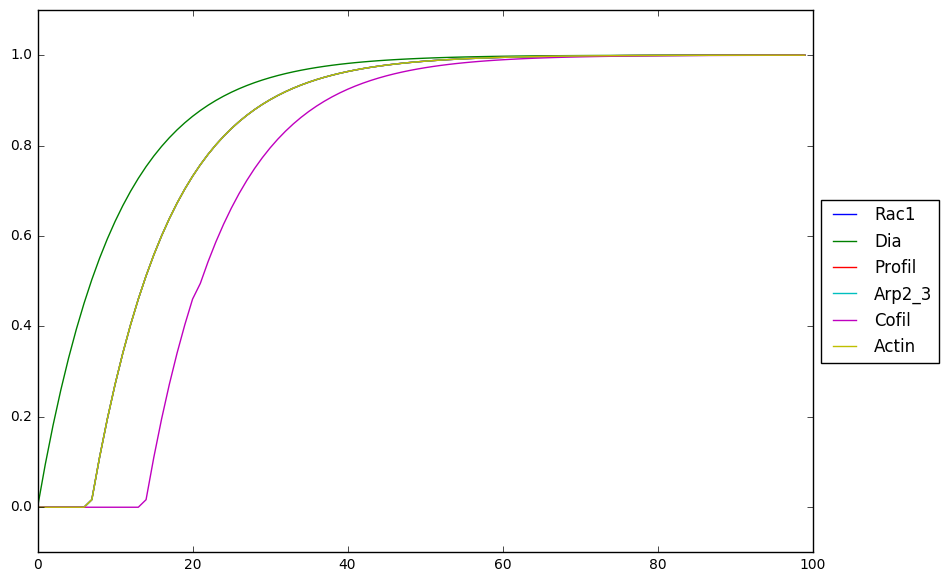

In [53]:
model = bl.Model( rules, mode='plde')
model.initialize(missing=initFunc)
model.iterate( fullt=10, steps=100 )

pl.figure(figsize=(10, 7));
for col in ["Rac1", "Dia", "Profil", "Arp2_3", "Cofil", "Actin"]:
    pl.plot(model.data[col], label=col)   
pl.ylim((-0.1, 1.1))
pl.legend(loc="center left", bbox_to_anchor=(1, 0.5));